<center> 
    <h1> Toronto Crime </h1>
<h3> Sprint 2</h3>
<h3> Basic Modelling</h3>
    </center>

##### Author: Arsalan Arif Radhu
##### Date: 9 November 2023

### Table of Contents:
- [Introduction](#intro) <br />
- [Basic Modelling](#bmodel)<br />
- [Basic Feature Engineering](#bfengin)<br />

### Introduction <a id="intro" /> 

Importing all the required libraries.

In [6]:
import numpy as np  #importing numpy library
import pandas as pd #importing pandas library
import matplotlib.pyplot as plt #importing matplotlib library
import seaborn as sns #importing seaborn library 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

This notebook aims to conduct some basic EDA for the cleaned dataset and preprocess the data for modelling.

Importing our data and reading through it.

In [7]:
#Reading the csv file
final_df = pd.read_csv('../Data/FinalDataAdvAn.csv',low_memory=False, index_col=0)
pd.set_option('display.max_columns', None)
final_df.head(10)

,CRIME_TYPE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,OCC_YEAR,OCC_MONTH,OCC_DAY,UCR_CODE,UCR_EXT,LONG_WGS84,LAT_WGS84,DEATH,INJURIES,D11,D12,D13,D14,D22,D23,D31,D32,D33,D41,D42,D43,D51,D52,D53,D55,NSA,Apartment,Commercial,Educational,House,NotApplicable,Other,Outside,Transit
OBJECTID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,2014,1,1,1998,6,1,1480.0,110.0,-79.425896,43.757346,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,2014,1,1,2014,1,1,1430.0,100.0,-79.376497,43.666423,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,0,2014,1,1,2014,1,1,1430.0,100.0,-79.344839,43.678946,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,2014,1,1,2014,1,1,1420.0,110.0,-79.391841,43.646639,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
5,0,2014,1,1,2014,1,1,1430.0,100.0,-85.488744,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
6,0,2014,1,1,2014,1,1,1430.0,100.0,-79.416594,43.654753,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7,0,2014,1,1,2014,1,1,1430.0,100.0,-79.391279,43.671127,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
8,0,2014,1,1,2014,1,1,1420.0,100.0,-79.345795,43.703684,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
9,0,2014,1,1,2014,1,1,1430.0,100.0,-79.132919,43.780412,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


## Basic Modelling <a id="bmodel" />


I can finally try fitting it into a model! The first model I will be trying is a simple Logistic Regression model without much featue engineering!

In [8]:
# Split the DataFrame into features (X) and the target variable (y)
X = final_df.drop(columns=['CRIME_TYPE'])  # Features
y = final_df['CRIME_TYPE']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Create and fit the logistic regression model
logreg_model = LogisticRegression(max_iter=7000, n_jobs=4)
logreg_model.fit(X_train, y_train)

# Now the model is trained, and you can use it for prediction or evaluation
# Training and test score
print(f"Train score: {logreg_model.score(X_train, y_train)}")
print(f"Test score: {logreg_model.score(X_test, y_test)}")

Train score: 0.8606653573120217
Test score: 0.858627181232351


<ul>
<li><b>Model Performance:</b>

The training score <b>(0.861)</b> is slightly higher than the testing score <b>(0.859)</b>. This indicates that the model is performing relatively well on unseen data (testing set) and is not significantly overfitting the training data.
The testing score being close to the training score suggests that the model generalizes reasonably well to new, unseen data.</li>
<li><b>Generalization:</b>

The small difference between the training and testing scores implies that the model is not suffering heavily from overfitting or underfitting. It's able to generalize its predictions on new, unseen data, maintaining a similar level of accuracy compared to the training data.</li>

</ul>


Checking for collinearity !

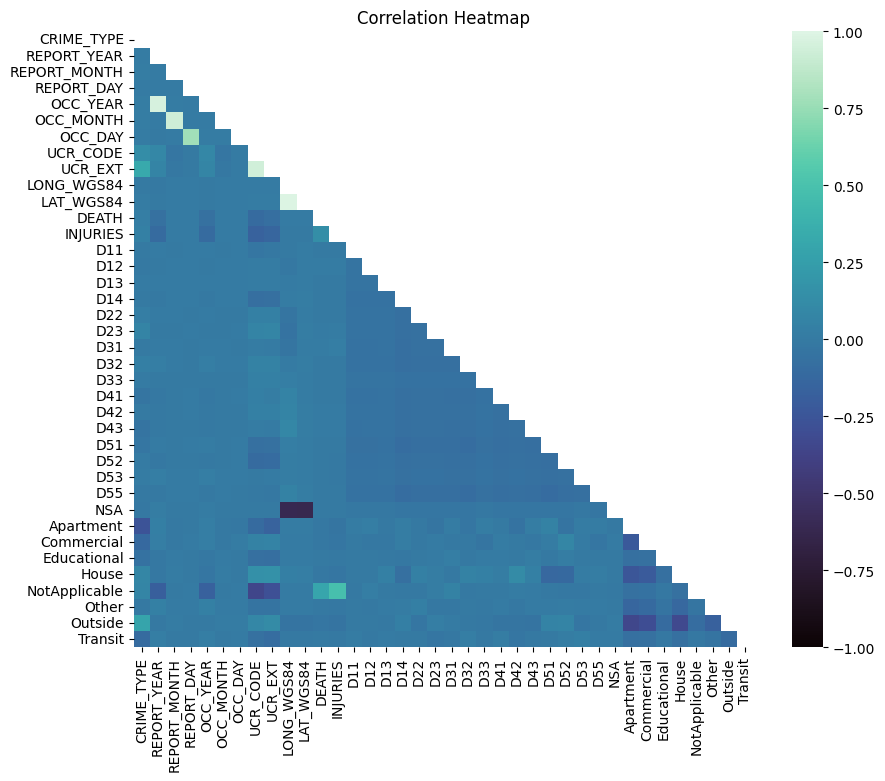

In [9]:
# Calculate the correlation matrix for all columns
correlation_matrix = final_df.corr(numeric_only=True)

# Display the correlation matrix
correlation_matrix

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, cmap='mako', center=0, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

The graph is not indicating any high collinearity between the target variable and the predictor variables. So, we will be looking at the real values of the correlation between them.

In [10]:
correlation_matrix.CRIME_TYPE

CRIME_TYPE       1.000000
REPORT_YEAR      0.008901
REPORT_MONTH     0.016923
REPORT_DAY       0.001509
OCC_YEAR         0.017599
OCC_MONTH        0.020690
OCC_DAY          0.008549
UCR_CODE         0.128256
UCR_EXT          0.328117
LONG_WGS84      -0.001514
LAT_WGS84        0.010133
DEATH            0.028435
INJURIES         0.045715
D11             -0.003981
D12             -0.009526
D13              0.004576
D14             -0.007567
D22              0.027754
D23              0.067339
D31             -0.003555
D32              0.032522
D33              0.004990
D41             -0.033506
D42             -0.004556
D43             -0.042740
D51             -0.024016
D52              0.004045
D53              0.011010
D55             -0.009446
NSA             -0.021254
Apartment       -0.261668
Commercial      -0.121357
Educational     -0.062361
House            0.082882
NotApplicable    0.075064
Other           -0.009431
Outside          0.290825
Transit         -0.102889
Name: CRIME_

As we can see from the above list, there is no significant collinearity between the target and predictor variables. So we can safely say there is no high collinearity.

## Basic Feature Engineering <a id="bfengin" />


In [11]:
# Split the DataFrame into features (X) and the target variable (y)
X = final_df.drop(columns=['CRIME_TYPE'])  # Features
y = final_df['CRIME_TYPE']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
# scale Data
my_scaler=StandardScaler()

X_train_scaled = my_scaler.fit_transform(X_train)
X_test_scaled = my_scaler.transform(X_test)

# pca
my_PCA=PCA(n_components=0.9)
my_PCA.fit(X_train_scaled)

X_train_pca=my_PCA.transform(X_train_scaled)
X_test_pca=my_PCA.transform(X_test_scaled)

# Fitting a model
logreg_scaled = LogisticRegression(C = 0.1, max_iter=10000)
logreg_scaled.fit(X_train_pca, y_train)

# Training and test score
print(f"Train score: {logreg_scaled.score(X_train_pca, y_train)}")
print(f"Test score: {logreg_scaled.score(X_test_pca, y_test)}")

Train score: 0.6591544706617068
Test score: 0.6581227523954336


As we can see the scores dropped significantly from over <b>~0.8</b> to near <b>~0.65</b>! This could be because of<b> overfitting</b> in the initial model
The initial high scores (0.85) might indicate overfitting, where the model learned the training data too well but struggled to generalize to new, unseen data. Scaling and applying PCA could have alleviated some of the overfitting, causing a drop in training and testing scores.

Confusion Matrix:
[[31482     0     0     0     0   330]
 [    0  7772     0     0     0  4755]
 [    0     0     0     0   246     0]
 [ 1172     0     0  2998     0  1050]
 [    0     0     0     0  1106     0]
 [    0  4162     0     0     0 27793]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     31812
           1       0.65      0.62      0.64     12527
           2       0.00      0.00      0.00       246
           3       1.00      0.57      0.73      5220
           4       0.82      1.00      0.90      1106
           5       0.82      0.87      0.84     31955

    accuracy                           0.86     82866
   macro avg       0.71      0.68      0.68     82866
weighted avg       0.86      0.86      0.85     82866



c:\Users\arifh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\arifh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\arifh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

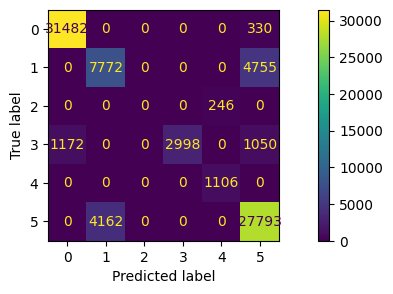

In [12]:
# Predict on the test set
y_pred = logreg_model.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
fig,ax = plt.subplots(figsize=(10, 3))

# Model on the original data
ConfusionMatrixDisplay.from_estimator(logreg_model, X_test, y_test, ax=ax)

#plt.title('Original Confusion Matrix')
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

<b>Class 0:</b><br />
<b>High precision (0.96):</b> The model correctly identifies class 0 instances, and when it predicts class 0, it is usually correct.<br />
<b>High recall (0.99):</b> The model effectively captures the majority of actual class 0 instances.<br />
<b>High F1-score (0.98):</b> The harmonic mean of precision and recall is excellent.<br /><br />
<b>Class 1:</b><br />
<b>Moderate precision (0.65):</b> The model's predictions for class 1 are correct, but it also has a notable number of false positives.<br />
<b>Moderate recall (0.62):</b> The model captures a substantial portion of actual class 1 instances.<br />
<b>Moderate F1-score (0.64):</b> A balanced measure of precision and recall.<br /><br />
<b>Class 2:</b><br />
<b>Very low precision (0.00):</b> The model does not correctly identify any instances of class 2. The precision is zero due to the absence of true positives.<br />
<b>Very low recall (0.00):</b> The model misses all actual instances of class 2.<br />
<b>Very low F1-score (0.00):</b> Reflects poor performance for class 2.<br /><br />
<b>Class 3:</b><br />
<b>High precision (1.00):</b> The model correctly identifies all instances of class 3 with no false positives.<br />
<b>Moderate recall (0.57):</b> The model captures approximately 57% of actual class 3 instances.<br />
<b>High F1-score (0.73):</b> A good balance between precision and recall.<br /><br />
<b>Class 4:</b><br />
<b>High precision (0.82):</b> The model correctly identifies class 4 instances with a few false positives.<br />
<b>High recall (1.00):</b> The model captures all actual class 4 instances.<br />
<b>High F1-score (0.90):</b> A strong balance between precision and recall.<br /><br />
<b>Class 5:</b><br />
<b>High precision (0.82):</b> The model correctly identifies class 5 instances with a moderate number of false positives.<br />
<b>High recall (0.87):</b> The model captures the majority of actual class 5 instances.<br />
<b>High F1-score (0.84):</b> A strong balance between precision and recall.<br /><br />
<b>Overall Evaluation:</b><br />
<b>Accuracy (0.86):</b> The overall accuracy of the model across all classes.<br />
<b>Macro Avg (0.71):</b> The macro-averaged precision, recall, and F1-score across all classes.<br />
<b>Weighted Avg (0.86):</b> The weighted average precision, recall, and F1-score, considering class imbalance.<br /><br />
<b>Actions needed:</b><br />
<b>Improve Class 2 Prediction:</b> Given the zero precision, recall, and F1-score for class 2, I need to investigate and enhance the model's ability to identify instances of this class.<br />
